In [ ]:
#!pip install tensorflow


In [ ]:
#!pip install numpy


In [ ]:
#!pip install matplotlib

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [3]:
print(X_train.dtype)

uint8


In [4]:
(X_train)

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
Y_train.shape

(50000, 1)

In [7]:
catagory=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

deer


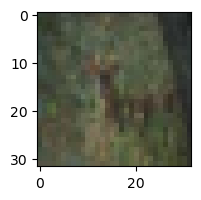

In [8]:
def image(X_train,Y_train,catagory,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    y=Y_train[index]
    print(catagory[int(y)])
    
image(X_train,Y_train,catagory,10)

In [9]:
#scaling of data

X_train=X_train/255.0
X_test=X_test/255.0

In [10]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

# Creating neural network using artificial neural network

In [12]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.8121 - accuracy: 0.3563
Epoch 2/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.6225 - accuracy: 0.4271
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5405 - accuracy: 0.4592
Epoch 4/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4813 - accuracy: 0.4782
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4302 - accuracy: 0.4968
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.3921 - accuracy: 0.5103
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.3517 - accuracy: 0.5239
Epoch 8/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.3153 - accuracy: 0.5398
Epoch 9/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.2853 - accuracy: 0.5498
Epoch 10/10
1563/1563 [==============================] - 79s 51m

In [18]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.4044 - accuracy: 0.4962


[1.404442310333252, 0.49619999527931213]

# Creating neural network using Convolutional neural network 

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4546 - accuracy: 0.4703
Epoch 2/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0779 - accuracy: 0.6173
Epoch 3/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9371 - accuracy: 0.6720
Epoch 4/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8439 - accuracy: 0.7039
Epoch 5/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7662 - accuracy: 0.7312
Epoch 6/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7010 - accuracy: 0.7539
Epoch 7/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6469 - accuracy: 0.7726
Epoch 8/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5925 - accuracy: 0.7907
Epoch 9/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5464 - accuracy: 0.8061
Epoch 10/15
1563/1563 [==============================] - 38s 24m

In [16]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 4s 10ms/step - loss: 1.2497 - accuracy: 0.6925


[1.249730110168457, 0.6924999952316284]

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_predict=cnn.predict(X_test)
y_classes=[np.argmax(elements) for elements in y_predict]


313/313 [==============================] - 3s 9ms/step


In [33]:
y=Y_test[9]
catagory[int(y)]

'automobile'

truck


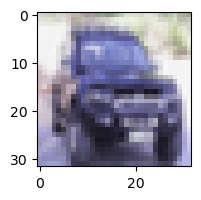

In [34]:
image(X_test,y_classes,catagory,9)

In [30]:
#checking for elements that are wrongly predicted
count=0
for i in range(len(Y_test)):
    if(Y_test[i]!=y_classes[i]):
        count=count+1
        print(i,Y_test[i],y_classes[i])
print(count)

6 [1] 9
9 [1] 9
12 [5] 2
15 [8] 6
17 [7] 9
22 [4] 0
24 [5] 4
28 [9] 7
35 [2] 6
36 [4] 7
37 [1] 0
47 [9] 3
51 [8] 0
52 [0] 2
53 [3] 6
56 [7] 3
57 [7] 5
58 [4] 2
61 [3] 5
66 [1] 8
68 [3] 5
70 [2] 0
76 [9] 2
77 [3] 5
78 [3] 5
85 [5] 7
86 [2] 9
87 [7] 2
91 [3] 6
99 [7] 3
109 [7] 5
111 [0] 2
112 [6] 2
114 [1] 9
115 [3] 0
118 [2] 6
119 [7] 2
126 [8] 0
128 [5] 3
129 [2] 0
139 [9] 8
140 [6] 4
143 [3] 5
145 [7] 4
147 [2] 6
148 [5] 3
149 [2] 3
151 [9] 1
154 [0] 6
155 [5] 6
158 [5] 3
160 [2] 3
164 [8] 0
165 [4] 7
167 [4] 6
168 [5] 2
172 [9] 0
179 [0] 1
181 [5] 2
182 [2] 6
183 [2] 6
184 [3] 0
187 [3] 2
188 [4] 3
189 [0] 8
195 [2] 4
198 [7] 3
201 [1] 9
210 [7] 6
211 [4] 9
218 [8] 0
219 [2] 4
220 [7] 4
223 [4] 5
226 [6] 5
227 [4] 2
228 [7] 4
229 [6] 4
239 [5] 2
241 [1] 9
245 [3] 6
247 [9] 8
249 [2] 0
251 [3] 5
254 [4] 2
255 [0] 7
256 [3] 6
259 [9] 1
262 [5] 3
263 [7] 3
267 [4] 7
269 [0] 3
271 [3] 4
275 [5] 7
277 [3] 5
279 [3] 6
293 [9] 1
295 [4] 2
302 [3] 5
303 [2] 5
309 [6] 2
312 [8] 0
314 [4] 5
31